#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [ ]:
first_name= "Radin"
last_name= "Khayyam"
student_number= "99101579"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [ ]:
#load the data set and fill nan value with 0
# TODO (load dataset)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape) #just for checking the dimension
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

X = np.vstack((x_train, x_test))
y = np.hstack((y_train,y_test))
print(X.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(70000, 784)


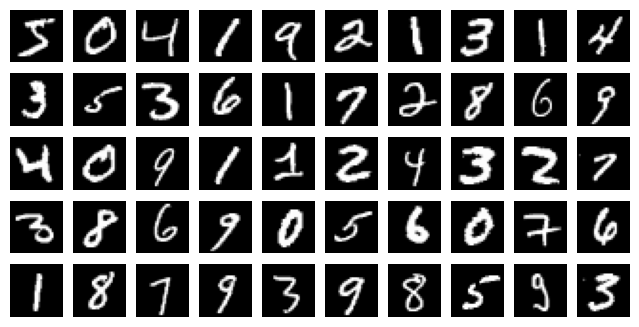

In [ ]:
# here show 50 first of this images

def show_images(num_images, X):

    num_cols = 10
    num_rows = num_images // num_cols
    plt.figure(figsize=(8,4))

    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        reshaped_img = X[i].reshape(28,28)
        plt.imshow(reshaped_img, cmap='gray')
        plt.axis("off")

    plt.show()

show_images(50, x_train)

In [ ]:
x_train = x_train.reshape(60000, 784)
x_train = x_train / np.max(x_train)



در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [ ]:
# make the mean of the data = 0
centered_data = x_train - np.mean(x_train, axis=0)

cov_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)


در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [ ]:
# Sort the eigenvalues and find the total variance
sorted_index = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_index]
eigenvectors = eigenvectors[:,sorted_index]


total_variance = np.sum(eigenvalues)

# Calculate the number of components needed
explained_variance_coef = 0.75
explained_variance = explained_variance_coef * total_variance

cumulative_variance = 0
num_components = 0

for i in eigenvalues:
    cumulative_variance += i
    num_components += 1
    if cumulative_variance >= explained_variance:
        break

print("Number of components that we need to explain", explained_variance_coef * 100, "% of the variance:", num_components)


Number of components that we need to explain 75.0 % of the variance: 34


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

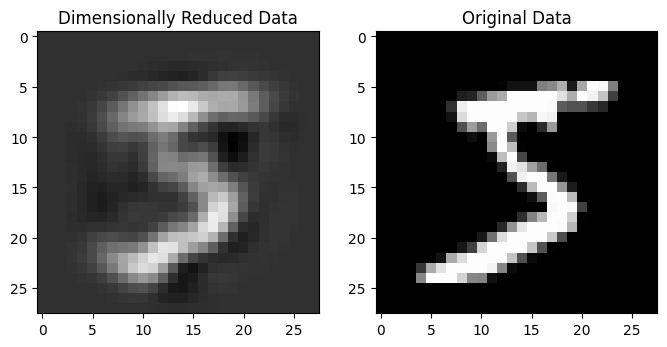

In [ ]:
k = num_components
V = eigenvectors[:, :k]
F = np.dot(x_train, V)
reconstructed_data = np.dot(F, V.T)
# Select one sample
sample_index = 0

# Reshape both original and reconstructed sample
original_sample = x_train[sample_index].reshape(28, 28)
reconstructed_sample = reconstructed_data[sample_index].reshape(28, 28)

# Plot both of them
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(reconstructed_sample, cmap='gray')
plt.title('Dimensionally Reduced Data')

plt.subplot(1, 2, 2)
plt.imshow(original_sample, cmap='gray')
plt.title('Original Data')

plt.show()

## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [ ]:
def do_pca(n_components, data):
  #normalization
  data = data / np.max(data)
  data = data - np.mean(data, axis=0)
  #doing pca
  pca = PCA(n_components = n_components)
  projected_data = pca.fit_transform(data)
  return projected_data

In [ ]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.

def ML_model(X, y, print_output=True):

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=35)
    model = RandomForestClassifier(n_estimators=32)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)

    if print_output:
        print("Accuracy: {:.2f}%".format(acc * 100))

    return acc

In [ ]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components

acc_list, pc_list = [], []

for pc in range(2,102):

    X_reduced = do_pca(pc,X)
    acc = ML_model(X_reduced, y, print_output=False)
    print("Components = ",pc," --------- Accuracy = ",acc)
    acc_list.append(acc)
    pc_list.append(pc)



Components =  2  --------- Accuracy =  0.4099285714285714
Components =  3  --------- Accuracy =  0.49492857142857144
Components =  4  --------- Accuracy =  0.6377142857142857
Components =  5  --------- Accuracy =  0.7498571428571429
Components =  6  --------- Accuracy =  0.8319285714285715
Components =  7  --------- Accuracy =  0.8682857142857143
Components =  8  --------- Accuracy =  0.8903571428571428
Components =  9  --------- Accuracy =  0.8980714285714285
Components =  10  --------- Accuracy =  0.9122142857142858
Components =  11  --------- Accuracy =  0.9145
Components =  12  --------- Accuracy =  0.9238571428571428
Components =  13  --------- Accuracy =  0.9256428571428571
Components =  14  --------- Accuracy =  0.9292142857142857
Components =  15  --------- Accuracy =  0.9324285714285714
Components =  16  --------- Accuracy =  0.9378571428571428
Components =  17  --------- Accuracy =  0.9404285714285714
Components =  18  --------- Accuracy =  0.9415
Components =  19  --------- 

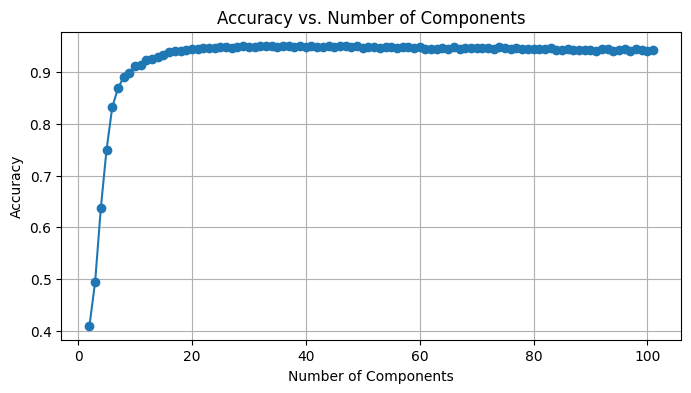

In [ ]:
#plot the accuracy based on components.
plt.figure(figsize=(8, 4))
plt.plot(pc_list, acc_list, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Components')
plt.grid()
plt.show()

In [ ]:
#print the number of components that maximize the accuracy and the max accuracy
max_accuracy = max(acc_list)
max_accuracy_index = acc_list.index(max_accuracy)
print("Max Accuracy: ",max_accuracy,"----------- Components: ",pc_list[max_accuracy_index])


Max Accuracy:  0.9509285714285715 ----------- Components:  34
